In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 98% 1.05G/1.06G [00:04<00:00, 274MB/s]
100% 1.06G/1.06G [00:04<00:00, 247MB/s]


In [3]:
#unzip files
!unzip dogs-vs-cats.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/dogs/dog.4419.jpg  
  inflating: train/dogs/dog.442.jpg  
  inflating: train/dogs/dog.4420.jpg  
  inflating: train/dogs/dog.4421.jpg  
  inflating: train/dogs/dog.4422.jpg  
  inflating: train/dogs/dog.4424.jpg  
  inflating: train/dogs/dog.4425.jpg  
  inflating: train/dogs/dog.4426.jpg  
  inflating: train/dogs/dog.4427.jpg  
  inflating: train/dogs/dog.4431.jpg  
  inflating: train/dogs/dog.4433.jpg  
  inflating: train/dogs/dog.4436.jpg  
  inflating: train/dogs/dog.4438.jpg  
  inflating: train/dogs/dog.4439.jpg  
  inflating: train/dogs/dog.444.jpg  
  inflating: train/dogs/dog.4440.jpg  
  inflating: train/dogs/dog.4441.jpg  
  inflating: train/dogs/dog.4442.jpg  
  inflating: train/dogs/dog.4443.jpg  
  inflating: train/dogs/dog.4444.jpg  
  inflating: train/dogs/dog.4445.jpg  
  inflating: train/dogs/dog.4446.jpg  
  inflating: train/dogs/dog.445.jpg  
  inflating: train/dogs/dog.4450.jpg  
  inflating: tra

In [4]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16

In [5]:
conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150,150,3))

58889256/58889256 [==============================] - 0s 0us/step


In [6]:
conv_base.summary()


Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [7]:
model=Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [8]:
conv_base.trainable=False

In [9]:
from keras.preprocessing.image import ImageDataGenerator,array_to_img,img_to_array,load_img

In [10]:
batch_size=32
train_datagen=ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
test_datagen=ImageDataGenerator(rescale=1./255)

train_generator=train_datagen.flow_from_directory(
    directory='/content/train',
    target_size=(150,150),
    batch_size=batch_size,
    class_mode='binary'
)
validation_generator=test_datagen.flow_from_directory(
    directory='/content/test',
    target_size=(150,150),
    batch_size=batch_size,
    class_mode='binary'
)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [11]:
model.compile(optimizer='adam',loss='binary_crossentropy'
                ,metrics=['accuracy'])

In [12]:
history=model.fit(train_generator,epochs=10,
        validation_data=validation_generator)

Epoch 1/10
625/625 [==============================] - 230s 366ms/step - loss: 0.3082 - accuracy: 0.8666 - val_loss: 0.2347 - val_accuracy: 0.8988
Epoch 2/10
625/625 [==============================] - 227s 363ms/step - loss: 0.2435 - accuracy: 0.8953 - val_loss: 0.2103 - val_accuracy: 0.9090
Epoch 3/10
625/625 [==============================] - 227s 363ms/step - loss: 0.2250 - accuracy: 0.9032 - val_loss: 0.2059 - val_accuracy: 0.9094
Epoch 4/10
625/625 [==============================] - 226s 362ms/step - loss: 0.2117 - accuracy: 0.9100 - val_loss: 0.2614 - val_accuracy: 0.8872
Epoch 5/10
625/625 [==============================] - 226s 361ms/step - loss: 0.2028 - accuracy: 0.9133 - val_loss: 0.2002 - val_accuracy: 0.9158
Epoch 6/10
625/625 [==============================] - 226s 361ms/step - loss: 0.1969 - accuracy: 0.9153 - val_loss: 0.1865 - val_accuracy: 0.9200
Epoch 7/10
625/625 [==============================] - 224s 358ms/step - loss: 0.1833 - accuracy: 0.9224 - val_loss: 0.1954 -

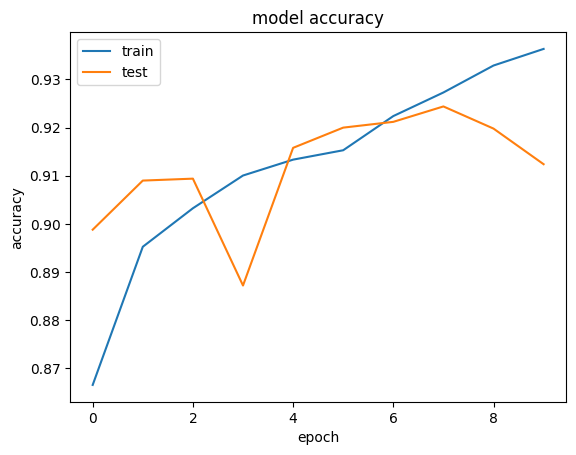

In [13]:
# plot train and test accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

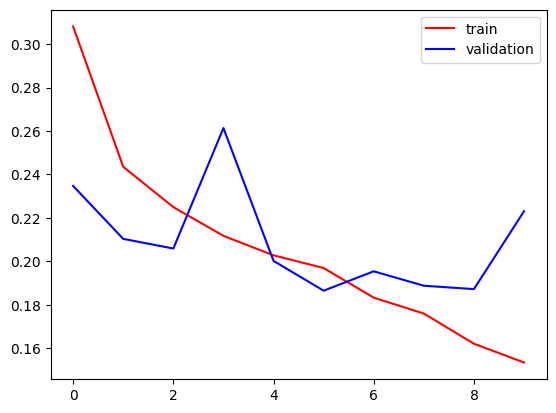

In [14]:
# val_loss graph
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()